# California Housing Prices Data (5 new features)
### (Median house prices for California districts derived from the 1990 census)

### Dataset Link: https://www.kaggle.com/fedesoriano/california-housing-prices-data-extra-features

# Context
This is the dataset is a modified version of the California Housing Data used in the paper Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being too toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

# Objective:
The basic objective of the project is to analyze the California_Housing_Prices (modified dataset) and predict the 'Median House Value' based on several demographic and other characteristics in California, also find the driving factors which affects the 'Median House Value' the most. 

# Modifications with respect to the original data
This dataset includes 5 extra features defined by author: "Distance to coast", "Distance to Los Angeles", "Distance to San Diego", "Distance to San Jose", and "Distance to San Francisco". These extra features try to account for the distance to the nearest coast and the distance to the centre of the largest cities in California.

The distances were calculated using the Haversine formula with the Longitude and Latitude: (Image shown below)

https://wikimedia.org/api/rest_v1/media/math/render/svg/a65dbbde43ff45bacd2505fcf32b44fc7dcd8cc0

where:

phi_1 and phi_2 are the Latitudes of point 1 and point 2, respectively
lambda_1 and lambda_2 are the Longitudes of point 1 and point 2, respectively
r is the radius of the Earth (6371km)
# Data Set description
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The columns are as follows, their names are pretty self-explanatory:

1) Median House Value: Median house value for households within a block (measured in US Dollars) [$]

2) Median Income: Median income for households within a block of houses (measured in tens of thousands of US Dollars) [10k$]

3) Median Age: Median age of a house within a block; a lower number is a newer building [years]

4) Total Rooms: Total number of rooms within a block

5) Total Bedrooms: Total number of bedrooms within a block

6) Population: Total number of people residing within a block

7) Households: Total number of households, a group of people residing within a home unit, for a block

8) Latitude: A measure of how far north a house is; a higher value is farther north [°]

9) Longitude: A measure of how far west a house is; a higher value is farther west [°]

10) Distance to coast: Distance to the nearest coast point [m]

11) Distance to Los Angeles: Distance to the centre of Los Angeles [m]

12) Distance to San Diego: Distance to the centre of San Diego [m]

13) Distance to San Jose: Distance to the centre of San Jose [m]

14) Distance to San Francisco: Distance to the centre of San Francisco [m]

# Source
This data was entirely modified and cleaned by me. The original data (without the distance features) was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

The original dataset can be found under the following link: https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

In [63]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

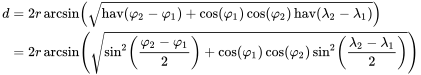

In [2]:
from IPython.display import Image
Image('distance.png')

### Example for finding Haversine Distance
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):

      R = 3959.87433 # this is in miles.  For Earth radius in kilometers use 6372.8 km

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

### Usage
lon1 = -103.548851
lat1 = 32.0004311
lon2 = -103.6041946
lat2 = 33.374939

print(haversine(lat1, lon1, lat2, lon2))

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None
 
# to suppress the notation 'e'    
pd.options.display.float_format = '{:.6f}'.format

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import SGDRegressor

# import non-parametric models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,StackingRegressor,VotingRegressor
from xgboost import XGBRegressor

In [3]:
# Reading the dataset
df = pd.read_csv('California_Houses.csv')
df.head()

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0       452600.000000       8.325200          41        880           129   
1       358500.000000       8.301400          21       7099          1106   
2       352100.000000       7.257400          52       1467           190   
3       341300.000000       5.643100          52       1274           235   
4       342200.000000       3.846200          52       1627           280   

   Population  Households  Latitude   Longitude  Distance_to_coast  \
0         322         126 37.880000 -122.230000        9263.040773   
1        2401        1138 37.860000 -122.220000       10225.733072   
2         496         177 37.850000 -122.240000        8259.085109   
3         558         219 37.850000 -122.250000        7768.086571   
4         565         259 37.850000 -122.250000        7768.086571   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0   556529.158342         735501.806984         67432.517001   
1   554279.850069         733236.884360         65049.908574   
2   554610.717069         733525.682937         64867.289833   
3   555194.266086         734095.290744         65287.138412   
4   555194.266086         734095.290744         65287.138412   

   Distance_to_SanFrancisco  
0              21250.213767  
1              20880.600400  
2              18811.487450  
3              18031.047568  
4              18031.047568

In [5]:
df.info()    # All the Features are Numerical including the Target variable (Regression)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [6]:
df.shape  # Rows and Columns

(20640, 14)

In [7]:
df.describe()

Median_House_Value  Median_Income   Median_Age    Tot_Rooms  \
count        20640.000000   20640.000000 20640.000000 20640.000000   
mean        206855.816909       3.870671    28.639486  2635.763081   
std         115395.615874       1.899822    12.585558  2181.615252   
min          14999.000000       0.499900     1.000000     2.000000   
25%         119600.000000       2.563400    18.000000  1447.750000   
50%         179700.000000       3.534800    29.000000  2127.000000   
75%         264725.000000       4.743250    37.000000  3148.000000   
max         500001.000000      15.000100    52.000000 39320.000000   

       Tot_Bedrooms   Population   Households     Latitude    Longitude  \
count  20640.000000 20640.000000 20640.000000 20640.000000 20640.000000   
mean     537.898014  1425.476744   499.539680    35.631861  -119.569704   
std      421.247906  1132.462122   382.329753     2.135952     2.003532   
min        1.000000     3.000000     1.000000    32.540000  -124.350000   
25%      295.000000   787.000000   280.000000    33.930000  -121.800000   
50%      435.000000  1166.000000   409.000000    34.260000  -118.490000   
75%      647.000000  1725.000000   605.000000    37.710000  -118.010000   
max     6445.000000 35682.000000  6082.000000    41.950000  -114.310000   

       Distance_to_coast  Distance_to_LA  Distance_to_SanDiego  \
count       20640.000000    20640.000000          20640.000000   
mean        40509.264883   269421.981646         398164.933494   
std         49140.039160   247732.446134         289400.563735   
min           120.676447      420.589109            484.917973   
25%          9079.756762    32111.253908         159426.394646   
50%         20522.019101   173667.461747         214739.830318   
75%         49830.414479   527156.235384         705795.399035   
max        333804.686371  1018260.119260        1196919.273898   

       Distance_to_SanJose  Distance_to_SanFrancisco  
count         20640.000000              20640.000000  
mean         349187.551219             386688.422291  
std          217149.875026             250122.192316  
min             569.448118                456.141313  
25%          113119.928682             117395.477505  
50%          459758.877000             526546.661701  
75%          516946.490963             584552.007907  
max          836762.678210             903627.663298

### Inference:
* 'Median_House_Value' - Target Variable with min_value as 14999`$` and max_value as 500001`$`.
* Several features contains high standard_deviation and range (max-min) of these features are very high.
* The mean and median values have significant difference for some features, which represents skewness in the variables.

In [9]:
df.isnull().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

### Inference: This dataset contains Non-NULL values.

# EDA

### Heat Map for Correlation Matrix

In [10]:
corr = df.corr()

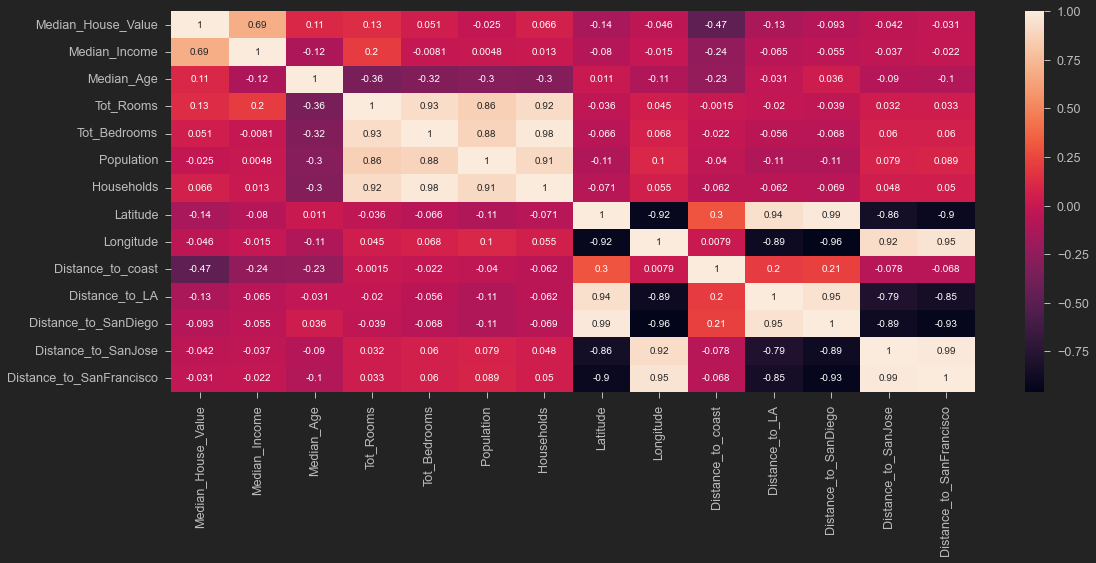

In [11]:
plt.figure(figsize=(18,7))
sns.heatmap(corr,annot=True);

### Inference:
* Independent Features are highly correlated among themselves. (Multicollinearity present in the dataset in both +ve and -ve)
* Meanwhile the relationship between target and independent variables are not strong except for 'Median_Income' with +0.69.
* Based on Latitude and Longitude features the features related to Distance are calculated, which results in Multicollinearity.

### Pairplot for Relationship between variables

<Figure size 1296x504 with 0 Axes>

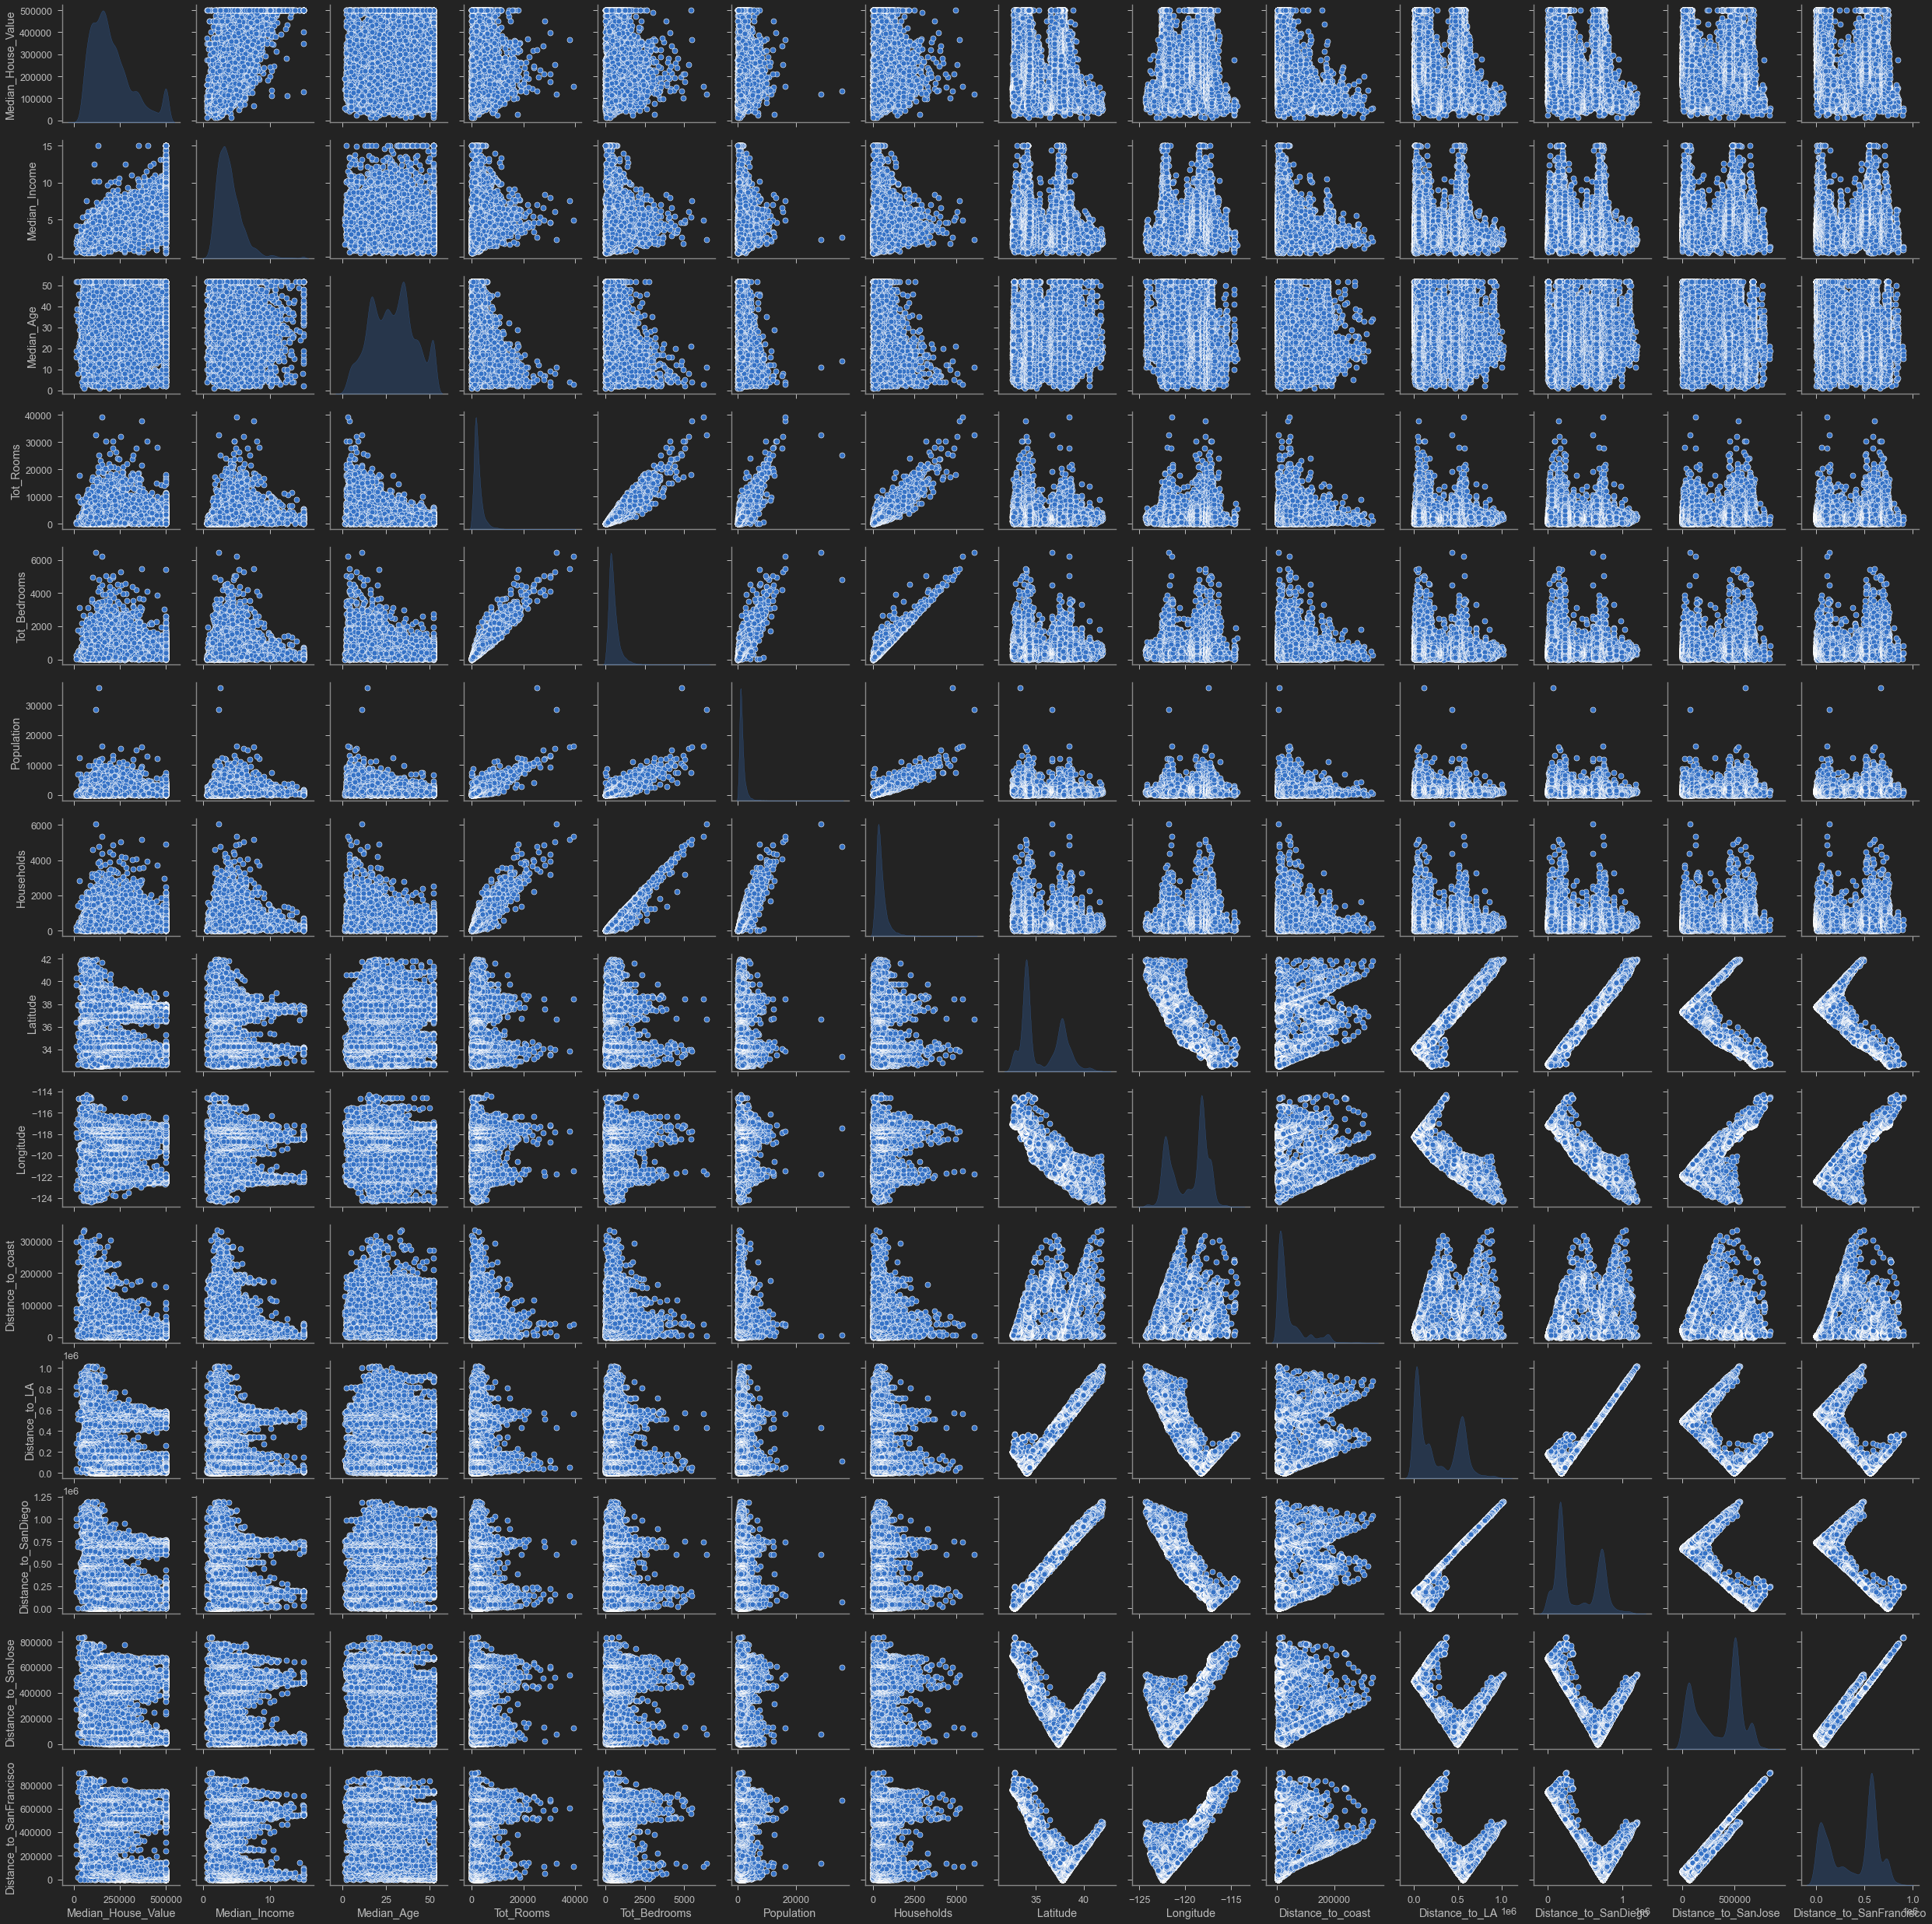

In [13]:
plt.figure(figsize=(18,7))
sns.pairplot(df,diag_kind='kde');

### Inference:
* From the above pair_plot, we can notice that there is NO-Linear Relationship between the target and other features.
* The Independent features involved in Multicollinearity shows a very strong linear relationhsip among themselves.
* Due to feature engineering of distance variables from latitude and longitude shows some unique pattern among those features in the pair_plot.

### Box Plot for Outliers Treatment

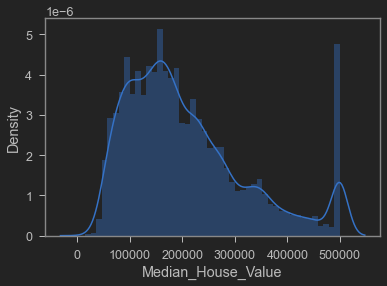

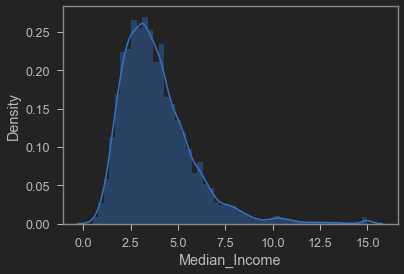

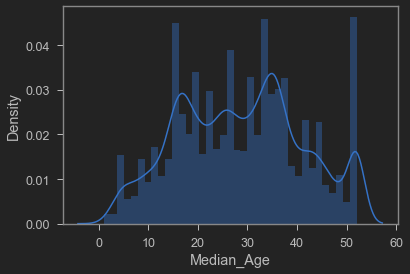

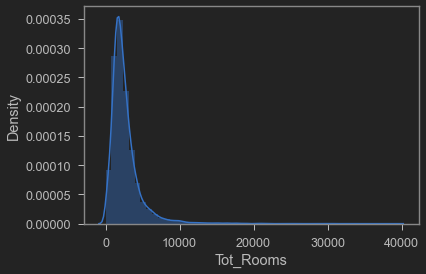

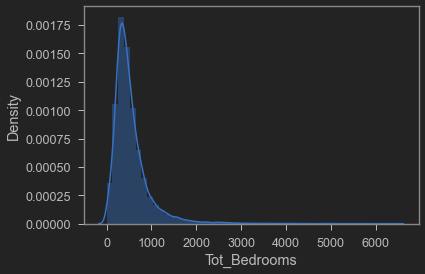

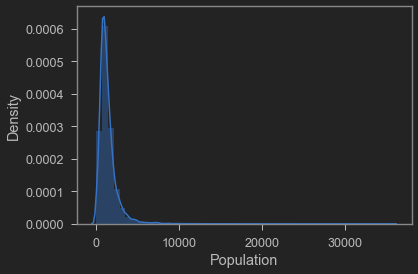

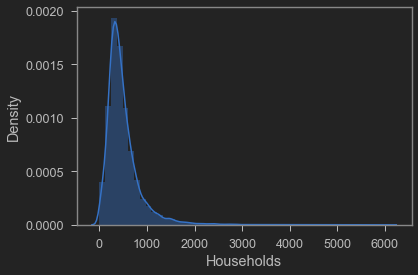

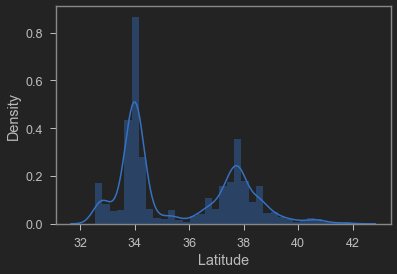

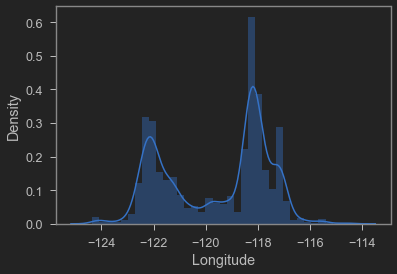

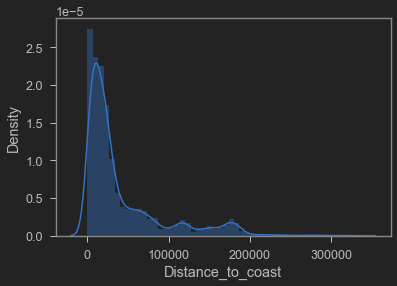

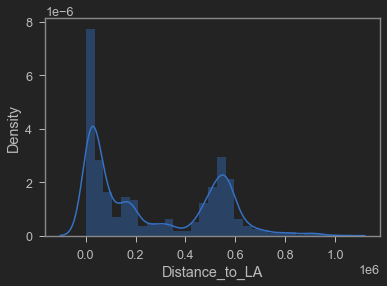

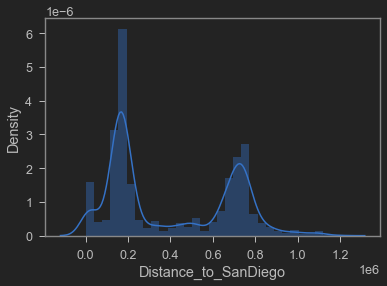

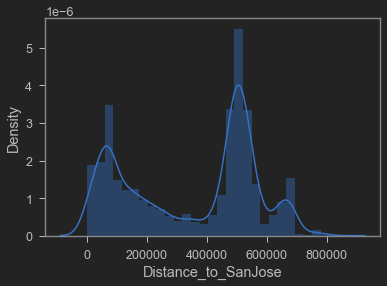

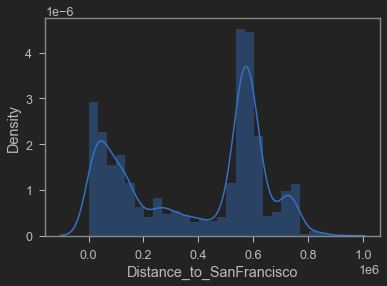

In [15]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

### Inference:
* Most of the features are Right-Skewed.
* We can also observe multi-modal distributions.

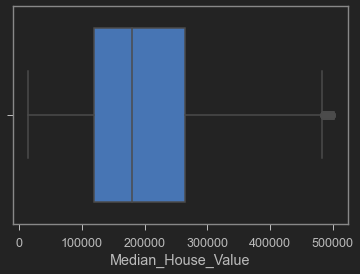

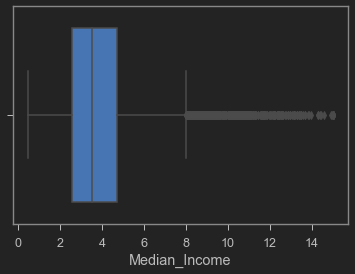

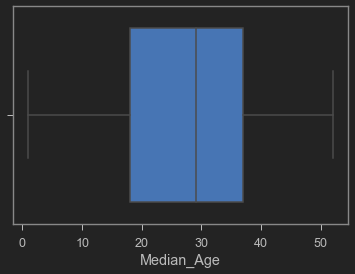

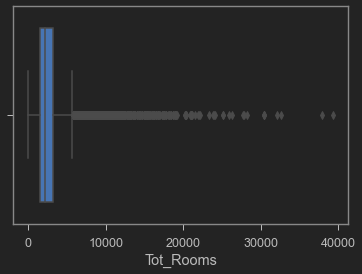

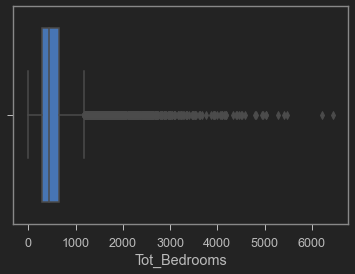

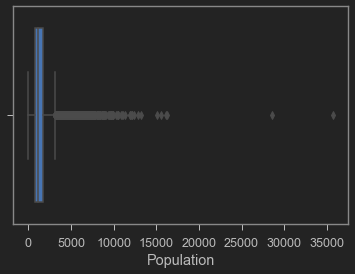

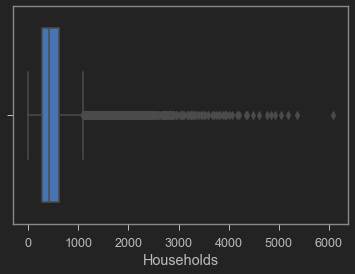

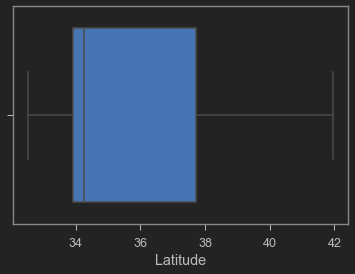

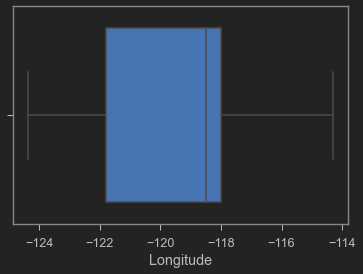

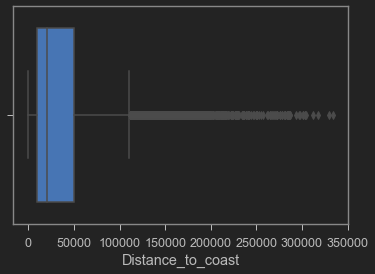

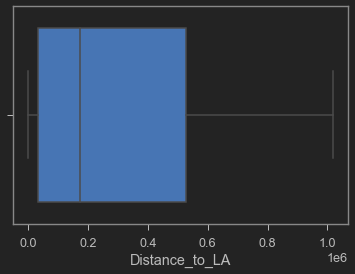

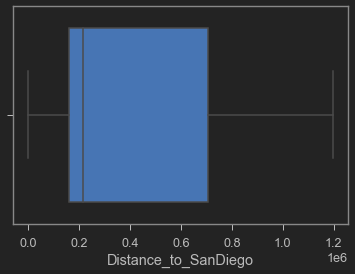

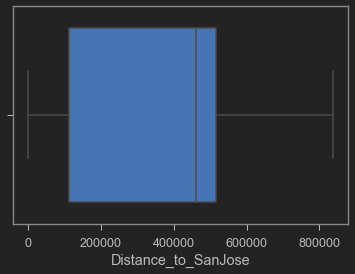

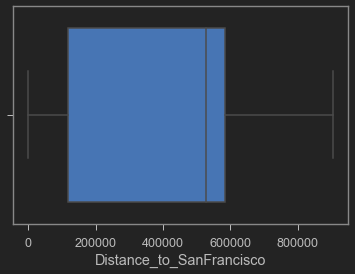

In [16]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [17]:
for i in df.columns:
    print(i,':',df[i].skew())                # Skewness Value for each variable

Median_House_Value : 0.9777632739098341
Median_Income : 1.6466567021344465
Median_Age : 0.060330637599136865
Tot_Rooms : 4.147343450632158
Tot_Bedrooms : 3.4530727523873823
Population : 4.93585822672712
Households : 3.410437711667147
Latitude : 0.46595300370997006
Longitude : -0.2978012079524362
Distance_to_coast : 1.9387092905699475
Distance_to_LA : 0.46653560236940067
Distance_to_SanDiego : 0.38493595172962236
Distance_to_SanJose : -0.22306922290920644
Distance_to_SanFrancisco : -0.26349900773641133


### Inference:
* From the box_plot we can notice that several features have outliers (whiskers=1.5) and the skewness values are obtained.

In [19]:
df.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')

In [4]:
df.drop(columns=['Latitude', 'Longitude'],inplace=True)      # Reduntant features

In [21]:
df.sample(5)

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
3499        195900.000000       5.129600          35       1579           300   
5425        414100.000000       4.967600          34       2243           444   
3743        364700.000000       2.333300          45       1176           250   
13765        86900.000000       2.803100          34       2405           541   
7561        104800.000000       2.321400          36       1073           271   

       Population  Households  Distance_to_coast  Distance_to_LA  \
3499         1012         265       28562.303664    30768.387610   
5425          973         413        7950.167560    16637.519213   
3743          471         228       18631.846387    18727.532393   
13765        1342         514       84825.067556   102609.196628   
7561         1385         288       16804.722693    17636.693521   

       Distance_to_SanDiego  Distance_to_SanJose  Distance_to_SanFrancisco  
3499          210124.776321        461012.674289             529043.285444  
5425          186277.249636        483984.852928             551956.821592  
3743          197495.682829        473256.917918             541277.498173  
13765         150614.937006        562720.080219             630278.803664  
7561          162733.881150        507812.333499             575819.837992

# Data Pre-Processing and Model Building:

### Parametric Model (Linear Regression):

### Base Model - OLS Linear Regression:

In [6]:
# We can build the OLS Model with the actual data without any pre-processing step.
# As we noticed that there is NO Linear relationship form the EDA, we can just try to statisfy the assumptions.

In [5]:
x = df.drop('Median_House_Value',1)
y = df['Median_House_Value']

xc = sm.add_constant(x)

In [23]:
ols_base_model = sm.OLS(y,xc).fit()

In [24]:
ols_base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Median_House_Value   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     3270.
Date:                Fri, 01 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:32:17   Log-Likelihood:            -2.5945e+05
No. Observations:               20640   AIC:                         5.189e+05
Df Residuals:                   20628   BIC:                         5.190e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     8.605e+04   6014.796     14.306      0.000    7.43e+04    9.78e+04
Median_Income             3.939e+04    342.072    115.164      0.000    3.87e+04    4.01e+04
Median_Age                 959.6035     45.579     21.054      0.000     870.266    1048.941
Tot_Rooms                   -6.5254      0.799     -8.168      0.000      -8.091      -4.959
Tot_Bedrooms               100.7365      6.915     14.568      0.000      87.183     114.290
Population                 -40.1912      1.092    -36.822      0.000     -42.331     -38.052
Households                  54.8247      7.519      7.291      0.000      40.087      69.563
Distance_to_coast           -0.6190      0.013    -48.791      0.000      -0.644      -0.594
Distance_to_LA              -0.1429      0.007    -19.607      0.000      -0.157      -0.129
Distance_to_SanDiego         0.0568      0.009      6.234      0.000       0.039       0.075
Distance_to_SanJose          0.0252      0.023      1.117      0.264      -0.019       0.069
Distance_to_SanFrancisco    -0.0881      0.025     -3.573      0.000      -0.136      -0.040
==============================================================================
Omnibus:                     4969.532   Durbin-Watson:                   0.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18542.246
Skew:                           1.170   Prob(JB):                         0.00
Kurtosis:                       7.010   Cond. No.                     8.93e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Inference:
* The condition number is large, 8.93e+06. This might indicate that there are strong multicollinearity or other numerical problems.
* Prob(JB),which is 0 <= 0.05 (C.I), which means Skewness and Kurtosis values are not equal to 0. Data is NOT Normal.
* Durbin-Watson values obtained is 0.951, which is less than 1.5 means positive auto-correlation in the error-terms.
* For this 'Distance_to_SanJose' feature the obtained pval is greater than 0.05, hence the feature is Not-Significant.

### Assumptions Checking:

### Multicollinearity detection

In [6]:
df1 = df.copy(deep=True)    # Making a copy of the original Df

In [27]:
vif = pd.DataFrame()
vif['VIF'] = [VIF(x.values,i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif.sort_values(by='VIF',ascending=False)

VIF                  Features
10 297.132396  Distance_to_SanFrancisco
9  271.117312       Distance_to_SanJose
5   95.019730                Households
3   94.182548              Tot_Bedrooms
8   45.942748      Distance_to_SanDiego
2   31.023789                 Tot_Rooms
7   30.239568            Distance_to_LA
4   16.730497                Population
0    8.094083             Median_Income
1    6.996582                Median_Age
6    2.657876         Distance_to_coast

In [28]:
x = df1.drop('Median_House_Value',1)

In [29]:
x_vif = x.drop('Distance_to_SanFrancisco',1)

vif = pd.DataFrame()
vif['VIF'] = [VIF(x_vif.values,i) for i in range(x_vif.shape[1])]
vif['Features'] = x_vif.columns
vif.sort_values(by='VIF',ascending=False)

VIF              Features
5 95.019114            Households
3 93.744769          Tot_Bedrooms
8 45.934735  Distance_to_SanDiego
2 30.117981             Tot_Rooms
7 27.561001        Distance_to_LA
4 16.407096            Population
0  7.130972         Median_Income
9  6.994697   Distance_to_SanJose
1  6.911562            Median_Age
6  2.320029     Distance_to_coast

In [30]:
x_vif = x_vif.drop('Households',1)

vif = pd.DataFrame()
vif['VIF'] = [VIF(x_vif.values,i) for i in range(x_vif.shape[1])]
vif['Features'] = x_vif.columns
vif.sort_values(by='VIF',ascending=False)

VIF              Features
7 45.921390  Distance_to_SanDiego
3 30.204321          Tot_Bedrooms
2 30.025521             Tot_Rooms
6 27.558506        Distance_to_LA
4 12.409828            Population
0  7.063902         Median_Income
8  6.976798   Distance_to_SanJose
1  6.898242            Median_Age
5  2.264728     Distance_to_coast

In [31]:
x_vif = x_vif.drop('Distance_to_SanDiego',1)

vif = pd.DataFrame()
vif['VIF'] = [VIF(x_vif.values,i) for i in range(x_vif.shape[1])]
vif['Features'] = x_vif.columns
vif.sort_values(by='VIF',ascending=False)

VIF             Features
3 28.856771         Tot_Bedrooms
2 28.329818            Tot_Rooms
4 12.102319           Population
0  5.904831        Median_Income
7  5.113918  Distance_to_SanJose
1  5.019704           Median_Age
6  3.542719       Distance_to_LA
5  1.886401    Distance_to_coast

In [32]:
x_vif = x_vif.drop('Tot_Bedrooms',1)

vif = pd.DataFrame()
vif['VIF'] = [VIF(x_vif.values,i) for i in range(x_vif.shape[1])]
vif['Features'] = x_vif.columns
vif.sort_values(by='VIF',ascending=False)

VIF             Features
2 11.540061            Tot_Rooms
3 10.578481           Population
0  4.888351        Median_Income
1  4.860323           Median_Age
6  4.831298  Distance_to_SanJose
5  3.442247       Distance_to_LA
4  1.870497    Distance_to_coast

In [33]:
x_vif = x_vif.drop('Tot_Rooms',1)

vif = pd.DataFrame()
vif['VIF'] = [VIF(x_vif.values,i) for i in range(x_vif.shape[1])]
vif['Features'] = x_vif.columns
vif.sort_values(by='VIF',ascending=False)

VIF             Features
5 4.831293  Distance_to_SanJose
1 4.499331           Median_Age
0 4.171983        Median_Income
4 3.402740       Distance_to_LA
2 2.440717           Population
3 1.864372    Distance_to_coast

In [34]:
y = df1['Median_House_Value']
xc = sm.add_constant(x_vif)

In [35]:
ols_model1 = sm.OLS(y,xc).fit()

In [36]:
ols_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Median_House_Value   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     4987.
Date:                Fri, 01 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:32:19   Log-Likelihood:            -2.6062e+05
No. Observations:               20640   AIC:                         5.213e+05
Df Residuals:                   20633   BIC:                         5.213e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.169e+05   3641.919     32.100      0.000     1.1e+05    1.24e+05
Median_Income        3.732e+04    287.799    129.683      0.000    3.68e+04    3.79e+04
Median_Age            834.0788     45.965     18.146      0.000     743.984     924.174
Population             -1.7401      0.483     -3.602      0.000      -2.687      -0.793
Distance_to_coast      -0.6589      0.011    -57.595      0.000      -0.681      -0.636
Distance_to_LA         -0.0742      0.004    -20.684      0.000      -0.081      -0.067
Distance_to_SanJose    -0.0838      0.004    -20.743      0.000      -0.092      -0.076
==============================================================================
Omnibus:                     4446.630   Durbin-Watson:                   0.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10946.289
Skew:                           1.192   Prob(JB):                         0.00
Kurtosis:                       5.655   Cond. No.                     3.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
y_pred = ols_model1.predict(xc)

In [38]:
stats.shapiro(y)   # Not Normal pval <= 0.05

ShapiroResult(statistic=0.9122979640960693, pvalue=0.0)

In [39]:
stats.shapiro(ols_model1.resid) # Not Normal pval <= 0.05

ShapiroResult(statistic=0.92411208152771, pvalue=0.0)

### Overall Inference:

* Most of the Assumptions of Linear Regression are not satisfied. 
* Even after treating Multicollinearity using VIF, still the model performance is poor.
* So, we can't use Linear Models for this dataset. We have to try Non-Linear Models to get better results.

### Non-Parametric Models:

In [41]:
df1.head()

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0       452600.000000       8.325200          41        880           129   
1       358500.000000       8.301400          21       7099          1106   
2       352100.000000       7.257400          52       1467           190   
3       341300.000000       5.643100          52       1274           235   
4       342200.000000       3.846200          52       1627           280   

   Population  Households  Distance_to_coast  Distance_to_LA  \
0         322         126        9263.040773   556529.158342   
1        2401        1138       10225.733072   554279.850069   
2         496         177        8259.085109   554610.717069   
3         558         219        7768.086571   555194.266086   
4         565         259        7768.086571   555194.266086   

   Distance_to_SanDiego  Distance_to_SanJose  Distance_to_SanFrancisco  
0         735501.806984         67432.517001              21250.213767  
1         733236.884360         65049.908574              20880.600400  
2         733525.682937         64867.289833              18811.487450  
3         734095.290744         65287.138412              18031.047568  
4         734095.290744         65287.138412              18031.047568

### Splitting the data set

In [7]:
x = df1.drop('Median_House_Value',1)
y = df1['Median_House_Value']

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7)

### Scaling

In [9]:
ss = StandardScaler()

In [10]:
# For cross-validation score:
x_scaled = x.copy(deep=True)
x_scaled[x.columns] = ss.fit_transform(x[x.columns])

In [11]:
x_scaled.head()

Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  Population  Households  \
0       2.344766    0.982143  -0.804819     -0.970706   -0.974429   -0.977033   
1       2.332238   -0.607019   2.045890      1.348649    0.861439    1.669961   
2       1.782699    1.856182  -0.535746     -0.825895   -0.820777   -0.843637   
3       0.932968    1.856182  -0.624215     -0.719067   -0.766028   -0.733781   
4      -0.012881    1.856182  -0.462404     -0.612239   -0.759847   -0.629157   

   Distance_to_coast  Distance_to_LA  Distance_to_SanDiego  \
0          -0.635876        1.158969              1.165668   
1          -0.616285        1.149889              1.157842   
2          -0.656307        1.151224              1.158840   
3          -0.666299        1.153580              1.160808   
4          -0.666299        1.153580              1.160808   

   Distance_to_SanJose  Distance_to_SanFrancisco  
0            -1.297546                 -1.461074  
1            -1.308518                 -1.462552  
2            -1.309359                 -1.470824  
3            -1.307426                 -1.473945  
4            -1.307426                 -1.473945

In [12]:
# For train-test split:
x_train[x_train.columns] = ss.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = ss.transform(x_test[x_test.columns])

In [13]:
x_train.shape,x_test.shape

((14448, 11), (6192, 11))

In [14]:
y_train.shape,y_test.shape

((14448,), (6192,))

# 1) KNNRegressor:

In [50]:
knn=KNeighborsRegressor()
knn_params={'n_neighbors':np.arange(1,20),'weights':['uniform','distance'],'metric':['euclidean','manhattan','Chebyshev']}

k = KFold(n_splits=5,shuffle=True,random_state=7)
grid_cv = GridSearchCV(knn,knn_params,cv=k,scoring='neg_root_mean_squared_error')
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan', 'Chebyshev'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error')

In [51]:
grid_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

In [52]:
knn = KNeighborsRegressor(**grid_cv.best_params_)
knn_model = knn.fit(x_train,y_train)

In [53]:
# For Train-Test Split

In [54]:
y_train_pred = knn_model.predict(x_train)
y_test_pred = knn_model.predict(x_test)

In [55]:
r2_knn_train = r2_score(y_train,y_train_pred)
r2_knn_train

1.0

In [56]:
rmse_knn_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_knn_train

0.0

In [58]:
r2_knn_test = r2_score(y_test,y_test_pred)
r2_knn_test

0.7577908847152312

In [59]:
rmse_knn_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
rmse_knn_test

56882.57350440857

In [60]:
# For Cross-Validation Score

In [61]:
knn = KNeighborsRegressor(**grid_cv.best_params_)
k = KFold(n_splits=5,shuffle=True,random_state=7)

cv = cross_val_score(estimator=knn,X=x_scaled,y=y,cv=k,scoring='neg_root_mean_squared_error')
cv = np.abs(cv)
cv

array([57420.80805073, 56683.5007622 , 55363.71608756, 56126.7629864 ,
       55627.64234062])

In [62]:
rmse_knn = np.mean(cv)          # Bias_Error
rmse_knn              

56244.486045500125

In [63]:
rmse_knn_std = np.std(cv,ddof=1)    # Variance_Error
rmse_knn_std

828.6401473442038

In [64]:
knn = KNeighborsRegressor(**grid_cv.best_params_)
k = KFold(n_splits=5,shuffle=True,random_state=7)

cv = cross_val_score(estimator=knn,X=x_scaled,y=y,cv=k,scoring='r2')
cv = np.abs(cv)
cv

array([0.7548618 , 0.7602812 , 0.76569896, 0.76313755, 0.76772037])

In [65]:
r2_knn = np.mean(cv)
r2_knn

0.7623399769681944

# 2) DecisionTreeRegressor:

In [67]:
dt = DecisionTreeRegressor(random_state=7)
params={'max_depth':np.arange(1,12),'max_features':['auto', 'sqrt', 'log2']}

k = KFold(n_splits=5,shuffle=True,random_state=7)
grid_cv = GridSearchCV(dt,params,cv=k,scoring='neg_root_mean_squared_error')
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=7),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='neg_root_mean_squared_error')

In [68]:
grid_cv.best_params_

{'max_depth': 8, 'max_features': 'auto'}

In [69]:
dt = DecisionTreeRegressor(**grid_cv.best_params_,random_state=7)
dt_model = dt.fit(x_train,y_train)

In [70]:
# For Train-Test Split

In [71]:
y_train_pred = dt_model.predict(x_train)
y_test_pred = dt_model.predict(x_test)

In [72]:
r2_dt_train = r2_score(y_train,y_train_pred)
r2_dt_train

0.7749267313116146

In [73]:
rmse_dt_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_dt_train

54702.018383105125

In [75]:
r2_dt_test = r2_score(y_test,y_test_pred)
r2_dt_test

0.7081832702473942

In [76]:
rmse_dt_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
rmse_dt_test

62436.57738795782

In [77]:
# For Cross-Validation Score

In [78]:
dt = DecisionTreeRegressor(**grid_cv.best_params_,random_state=7)
k = KFold(n_splits=5,shuffle=True,random_state=7)

cv = cross_val_score(estimator=dt,X=x_scaled,y=y,cv=k,scoring='neg_root_mean_squared_error')
cv = np.abs(cv)
cv

array([62849.59477212, 62386.26948039, 59036.47374948, 62079.61606568,
       60980.71772182])

In [79]:
rmse_dt = np.mean(cv)          # Bias_Error
rmse_dt              

61466.53435789725

In [80]:
rmse_dt_std = np.std(cv,ddof=1)    # Variance_Error
rmse_dt_std

1522.8140357443967

In [81]:
dt = DecisionTreeRegressor(**grid_cv.best_params_,random_state=7)
k = KFold(n_splits=5,shuffle=True,random_state=7)

cv = cross_val_score(estimator=dt,X=x_scaled,y=y,cv=k,scoring='r2')
cv = np.abs(cv)
cv

array([0.70631798, 0.70961993, 0.73358139, 0.71022943, 0.72086462])

In [82]:
r2_dt = np.mean(cv)
r2_dt

0.7161226720532617

# 3) RandomForestRegressor:

In [84]:
rf = RandomForestRegressor(random_state=7)
params={'max_depth':np.arange(1,12)}

k = KFold(n_splits=5,shuffle=True,random_state=7)
grid_cv = GridSearchCV(rf,params,cv=k,scoring='neg_root_mean_squared_error')
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=RandomForestRegressor(random_state=7),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])},
             scoring='neg_root_mean_squared_error')

In [85]:
grid_cv.best_params_

{'max_depth': 11}

In [86]:
rf = RandomForestRegressor(max_depth=11,random_state=7)
rf_model = rf.fit(x_train,y_train)

In [87]:
# For Train-Test Split

In [88]:
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

In [89]:
r2_rf_train = r2_score(y_train,y_train_pred)
r2_rf_train

0.8924831669968802

In [90]:
rmse_rf_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_rf_train

37807.64476648826

In [92]:
r2_rf_test = r2_score(y_test,y_test_pred)
r2_rf_test

0.789929723246088

In [93]:
rmse_rf_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
rmse_rf_test

52974.43077894004

In [94]:
# For Cross-Validation Score

In [95]:
rf = RandomForestRegressor(max_depth=11,random_state=7)
k = KFold(n_splits=5,shuffle=True,random_state=7)

cv = cross_val_score(estimator=rf,X=x_scaled,y=y,cv=k,scoring='neg_root_mean_squared_error')
cv = np.abs(cv)
cv

array([53246.72081617, 52623.589696  , 50359.89309172, 52405.00080086,
       51597.72845525])

In [96]:
rmse_rf = np.mean(cv)          # Bias_Error
rmse_rf              

52046.58657200074

In [97]:
rmse_rf_std = np.std(cv,ddof=1)    # Variance_Error
rmse_rf_std

1112.2189615762204

In [98]:
rf = RandomForestRegressor(max_depth=11,random_state=7)
k = KFold(n_splits=5,shuffle=True,random_state=7)

cv = cross_val_score(estimator=rf,X=x_scaled,y=y,cv=k,scoring='r2')
cv = np.abs(cv)
cv

array([0.78920606, 0.79339078, 0.80613771, 0.79350873, 0.80015606])

In [99]:
r2_rf = np.mean(cv)
r2_rf

0.7964798670481114

# 4) AdaBoostRegressor:

In [101]:
dt = DecisionTreeRegressor(max_depth=8,max_features='auto',random_state=7)
ada = AdaBoostRegressor(base_estimator=dt,random_state=7)
ada_model = ada.fit(x_train,y_train)

In [102]:
# For Train-Test Split

In [103]:
y_train_pred = ada_model.predict(x_train)
y_test_pred = ada_model.predict(x_test)

In [104]:
r2_ada_train = r2_score(y_train,y_train_pred)
r2_ada_train

0.8156745637642218

In [105]:
rmse_ada_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_ada_train

49503.28590319287

In [107]:
r2_ada_test = r2_score(y_test,y_test_pred)
r2_ada_test

0.7387070115778653

In [108]:
rmse_ada_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
rmse_ada_test

59081.0048256249

In [109]:
# For Cross-Validation Score

In [110]:
dt = DecisionTreeRegressor(max_depth=8,max_features='auto',random_state=7)
ada = AdaBoostRegressor(base_estimator=dt,random_state=7)
k = KFold(n_splits=5,shuffle=True,random_state=7)

cv = cross_val_score(estimator=ada,X=x_scaled,y=y,cv=k,scoring='neg_root_mean_squared_error')
cv = np.abs(cv)
cv

array([59537.73790972, 59648.75936805, 59020.91359954, 60515.25095471,
       58678.06075704])

In [111]:
rmse_ada = np.mean(cv)          # Bias_Error
rmse_ada              

59480.14451781049

In [112]:
rmse_ada_std = np.std(cv,ddof=1)    # Variance_Error
rmse_ada_std

699.5399734520068

In [113]:
dt = DecisionTreeRegressor(max_depth=8,max_features='auto',random_state=7)
ada = AdaBoostRegressor(base_estimator=dt,random_state=7)
k = KFold(n_splits=5,shuffle=True,random_state=7)

cv = cross_val_score(estimator=ada,X=x_scaled,y=y,cv=k,scoring='r2')
cv = np.abs(cv)
cv

array([0.73645362, 0.73454458, 0.73372181, 0.72464948, 0.74154715])

In [114]:
r2_ada = np.mean(cv)
r2_ada

0.7341833282088517

# 5) GradientBoostRegressor:

In [116]:
gb = GradientBoostingRegressor(random_state=7)
gb_model = gb.fit(x_train,y_train)

In [117]:
# For Train-Test Split

In [118]:
y_train_pred = gb_model.predict(x_train)
y_test_pred = gb_model.predict(x_test)

In [119]:
r2_gb_train = r2_score(y_train,y_train_pred)
r2_gb_train

0.7956939877635072

In [120]:
rmse_gb_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_gb_train

52117.30685501433

In [122]:
r2_gb_test = r2_score(y_test,y_test_pred)
r2_gb_test

0.7696586724402265

In [123]:
rmse_gb_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
rmse_gb_test

55471.50230442416

In [124]:
# For Cross-Validation Score

In [125]:
gb = GradientBoostingRegressor(random_state=7)
k = KFold(n_splits=5,shuffle=True,random_state=7)

cv = cross_val_score(estimator=gb,X=x_scaled,y=y,cv=k,scoring='neg_root_mean_squared_error')
cv = np.abs(cv)
cv

array([55665.86798698, 56190.73237026, 53314.80118185, 55052.46033084,
       54636.36229963])

In [126]:
rmse_gb = np.mean(cv)          # Bias_Error
rmse_gb              

54972.0448339103

In [127]:
rmse_gb_std = np.std(cv,ddof=1)    # Variance_Error
rmse_gb_std

1099.1128032723448

In [128]:
gb = GradientBoostingRegressor(random_state=7)
k = KFold(n_splits=5,shuffle=True,random_state=7)

cv = cross_val_score(estimator=gb,X=x_scaled,y=y,cv=k,scoring='r2')
cv = np.abs(cv)
cv

array([0.76961704, 0.76443099, 0.78272021, 0.77211818, 0.77592502])

In [129]:
r2_gb = np.mean(cv)
r2_gb

0.7729622861923134

# 6) XGBRegressor:

In [131]:
xgb = XGBRegressor(random_state=7)
params={'max_depth':np.arange(1,12)}

k = KFold(n_splits=5,shuffle=True,random_state=7)
grid_cv = GridSearchCV(xgb,params,cv=k,scoring='neg_root_mean_squared_error')
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=7,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                        

In [132]:
grid_cv.best_params_

{'max_depth': 7}

In [229]:
xgb = XGBRegressor(max_depth=7,random_state=7)
xgb_model = xgb.fit(x_train,y_train)

In [134]:
# For Train-Test Split

In [135]:
y_train_pred = xgb_model.predict(x_train)
y_test_pred = xgb_model.predict(x_test)

In [136]:
r2_xgb_train = r2_score(y_train,y_train_pred)
r2_xgb_train

0.9643741805458618

In [137]:
rmse_xgb_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_xgb_train

21763.253630209532

In [139]:
r2_xgb_test = r2_score(y_test,y_test_pred)
r2_xgb_test

0.8202723818158927

In [140]:
rmse_xgb_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
rmse_xgb_test

48999.47247714823

In [141]:
# For Cross-Validation Score

In [142]:
xgb = XGBRegressor(max_depth=7,random_state=7)
k = KFold(n_splits=5,shuffle=True,random_state=7)

cv = cross_val_score(estimator=xgb,X=x_scaled,y=y,cv=k,scoring='neg_root_mean_squared_error')
cv = np.abs(cv)
cv

array([49819.68853384, 49185.40912892, 46949.09597294, 48487.41048227,
       47169.52954728])

In [143]:
rmse_xgb = np.mean(cv)          # Bias_Error
rmse_xgb              

48322.226733049916

In [144]:
rmse_xgb_std = np.std(cv,ddof=1)    # Variance_Error
rmse_xgb_std

1247.8942514137502

In [145]:
xgb = XGBRegressor(max_depth=7,random_state=7)
k = KFold(n_splits=5,shuffle=True,random_state=7)

cv = cross_val_score(estimator=xgb,X=x_scaled,y=y,cv=k,scoring='r2')
cv = np.abs(cv)
cv

array([0.81546685, 0.81950659, 0.83150841, 0.8232277 , 0.83298599])

In [146]:
r2_xgb = np.mean(cv)
r2_xgb

0.8245391089845964

# 7) StackingRegressor:

In [148]:
knn = KNeighborsRegressor(metric='manhattan',n_neighbors=9,weights='distance')
rf = RandomForestRegressor(max_depth=11,random_state=7)
gb = GradientBoostingRegressor(random_state=7)

est = [('KNN',knn),('RF',rf),('GB',gb)]

In [149]:
xgb = XGBRegressor(max_depth=7,random_state=7)

In [150]:
k = KFold(n_splits=5,shuffle=True,random_state=7)
stack = StackingRegressor(estimators=est,final_estimator=xgb,cv=k)
stack_model = stack.fit(x_train,y_train)

In [151]:
# For Train-Test Split

In [152]:
y_train_pred = stack_model.predict(x_train)
y_test_pred = stack_model.predict(x_test)

In [153]:
r2_stack_train = r2_score(y_train,y_train_pred)
r2_stack_train

0.8863464085815691

In [154]:
rmse_stack_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_stack_train

38871.64984748308

In [156]:
r2_stack_test = r2_score(y_test,y_test_pred)
r2_stack_test

0.7785867918864936

In [157]:
rmse_stack_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
rmse_stack_test

54385.829560286154

In [158]:
# For Cross-Validation Score

In [159]:
stack = StackingRegressor(estimators=est,final_estimator=xgb,cv=k)
k = KFold(n_splits=5,shuffle=True,random_state=7)

cv = cross_val_score(estimator=stack,X=x_scaled,y=y,cv=k,scoring='neg_root_mean_squared_error')
cv = np.abs(cv)
cv

array([54080.17442814, 54333.7452702 , 52236.47209344, 53057.01490066,
       52169.74391423])

In [160]:
rmse_stack = np.mean(cv)          # Bias_Error
rmse_stack            

53175.430121333746

In [161]:
rmse_stack_std = np.std(cv,ddof=1)    # Variance_Error
rmse_stack_std

1008.3805500136652

In [162]:
stack = StackingRegressor(estimators=est,final_estimator=xgb,cv=k)
k = KFold(n_splits=5,shuffle=True,random_state=7)

cv = cross_val_score(estimator=stack,X=x_scaled,y=y,cv=k,scoring='r2')
cv = np.abs(cv)
cv

array([0.78255543, 0.77974385, 0.7914206 , 0.78833851, 0.79570054])

In [163]:
r2_stack = np.mean(cv)
r2_stack

0.7875517845510028

# 8) VotingRegressor:

In [16]:
knn = KNeighborsRegressor(metric='manhattan',n_neighbors=9,weights='distance')
rf = RandomForestRegressor(max_depth=11,random_state=7)
gb = GradientBoostingRegressor(random_state=7)
xgb = XGBRegressor(max_depth=7,random_state=7)

est = [('xgb',xgb),('RF',rf),('GB',gb),('KNN',knn)]

In [17]:
vote = VotingRegressor(estimators=est)
vote_model = vote.fit(x_train,y_train)

In [167]:
# For Train-Test Split

In [18]:
y_train_pred = vote_model.predict(x_train)
y_test_pred = vote_model.predict(x_test)

In [19]:
r2_vote_train = r2_score(y_train,y_train_pred)
r2_vote_train

0.9485026521723532

In [20]:
rmse_vote_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_vote_train

26165.788313245004

In [21]:
r2_vote_test = r2_score(y_test,y_test_pred)
r2_vote_test

0.8124629702720245

In [22]:
rmse_vote_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
rmse_vote_test

50052.700228911366

In [174]:
# For Cross-Validation Score

In [175]:
vote = VotingRegressor(estimators=est)
k = KFold(n_splits=5,shuffle=True,random_state=7)

cv = cross_val_score(estimator=vote,X=x_scaled,y=y,cv=k,scoring='neg_root_mean_squared_error')
cv = np.abs(cv)
cv

array([50595.17362216, 50041.15828781, 48015.47640003, 49753.50972631,
       48808.04153805])

In [176]:
rmse_vote = np.mean(cv)          # Bias_Error
rmse_vote            

49442.67191487113

In [177]:
rmse_vote_std = np.std(cv,ddof=1)    # Variance_Error
rmse_vote_std

1027.4615590958033

In [178]:
vote = VotingRegressor(estimators=est)
k = KFold(n_splits=5,shuffle=True,random_state=7)

cv = cross_val_score(estimator=vote,X=x_scaled,y=y,cv=k,scoring='r2')
cv = np.abs(cv)
cv

array([0.80967731, 0.81317135, 0.82376741, 0.81387545, 0.82118145])

In [179]:
r2_vote = np.mean(cv)
r2_vote

0.8163345915735564

# Results:

In [181]:
results_df = pd.DataFrame()
results_df['Models'] = ['KNNRegressor','DecisionTreeRegressor','RandomForestRegressor',
                       'AdaBoostRegressor','GradientBoostRegressor','XGBRegressor',
                        'StackingRegressor','VotingRegressor']
results_df['r2_train'] = [r2_knn_train,r2_dt_train,r2_rf_train,r2_ada_train,r2_gb_train,
                         r2_xgb_train,r2_stack_train,r2_vote_train]
results_df['r2_test'] = [r2_knn_test,r2_dt_test,r2_rf_test,r2_ada_test,r2_gb_test,
                         r2_xgb_test,r2_stack_test,r2_vote_test]
results_df['rmse_train'] = [rmse_knn_train,rmse_dt_train,rmse_rf_train,rmse_ada_train,rmse_gb_train,
                         rmse_xgb_train,rmse_stack_train,rmse_vote_train]
results_df['rmse_test'] = [rmse_knn_test,rmse_dt_test,rmse_rf_test,rmse_ada_test,rmse_gb_test,
                         rmse_xgb_test,rmse_stack_test,rmse_vote_test]
results_df['r2_score'] = [r2_knn,r2_dt,r2_rf,r2_ada,r2_gb,
                         r2_xgb,r2_stack,r2_vote]
results_df['rmse_score (Bias_Error)'] = [rmse_knn,rmse_dt,rmse_rf,rmse_ada,rmse_gb,
                                         rmse_xgb,rmse_stack,rmse_vote]
results_df['rmse_std_score (Variance_Error)'] = [rmse_knn_std,rmse_dt_std,rmse_rf_std,rmse_ada_std,
                                                 rmse_gb_std,rmse_xgb_std,rmse_stack_std,
                                                 rmse_vote_std]
results_df

Models  r2_train  r2_test   rmse_train    rmse_test  \
0            KNNRegressor  1.000000 0.757791     0.000000 56882.573504   
1   DecisionTreeRegressor  0.774927 0.708183 54702.018383 62436.577388   
2   RandomForestRegressor  0.892483 0.789930 37807.644766 52974.430779   
3       AdaBoostRegressor  0.815675 0.738707 49503.285903 59081.004826   
4  GradientBoostRegressor  0.795694 0.769659 52117.306855 55471.502304   
5            XGBRegressor  0.964374 0.820272 21763.253630 48999.472477   
6       StackingRegressor  0.886346 0.778587 38871.649847 54385.829560   
7         VotingRegressor  0.948503 0.812463 26165.788313 50052.700229   

   r2_score  rmse_score (Bias_Error)  rmse_std_score (Variance_Error)  
0  0.762340             56244.486046                       828.640147  
1  0.716123             61466.534358                      1522.814036  
2  0.796480             52046.586572                      1112.218962  
3  0.734183             59480.144518                       699.539973  
4  0.772962             54972.044834                      1099.112803  
5  0.824539             48322.226733                      1247.894251  
6  0.787552             53175.430121                      1008.380550  
7  0.816335             49442.671915                      1027.461559

### Inference:
* All the relevant metrics of models are summarized above in the results_df.
* Here, we have r2_score and rmse for train,test and cross_validation.
* Bias and Variance Errors are listed above to check for model's fitting.
* Now, we need to select the Final Model by considering the Bias and Variance Errors Trade-off.

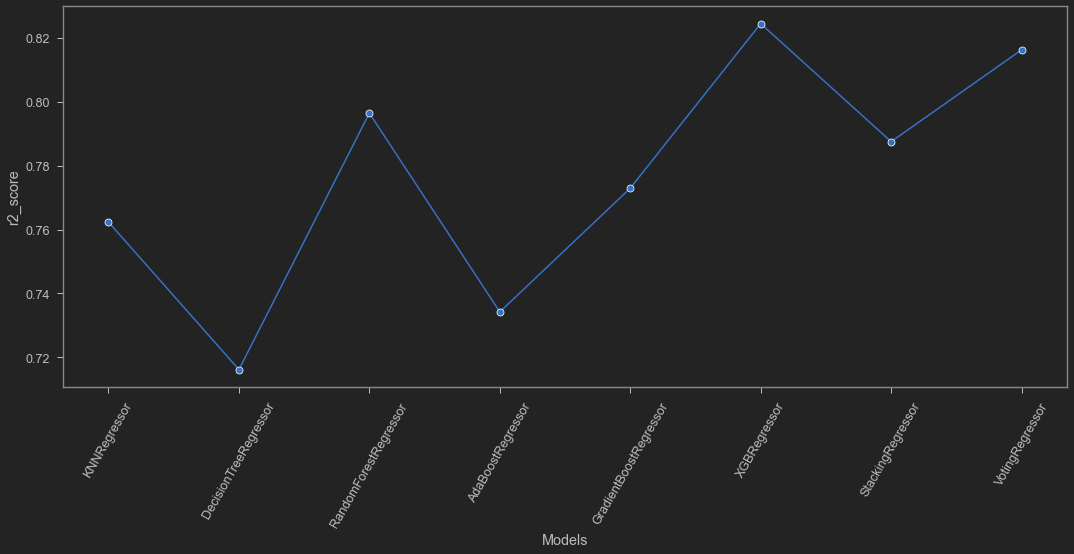

In [182]:
plt.figure(figsize=(18,7))
sns.lineplot(results_df['Models'],results_df['r2_score'],marker='o');
plt.xticks(rotation=60);

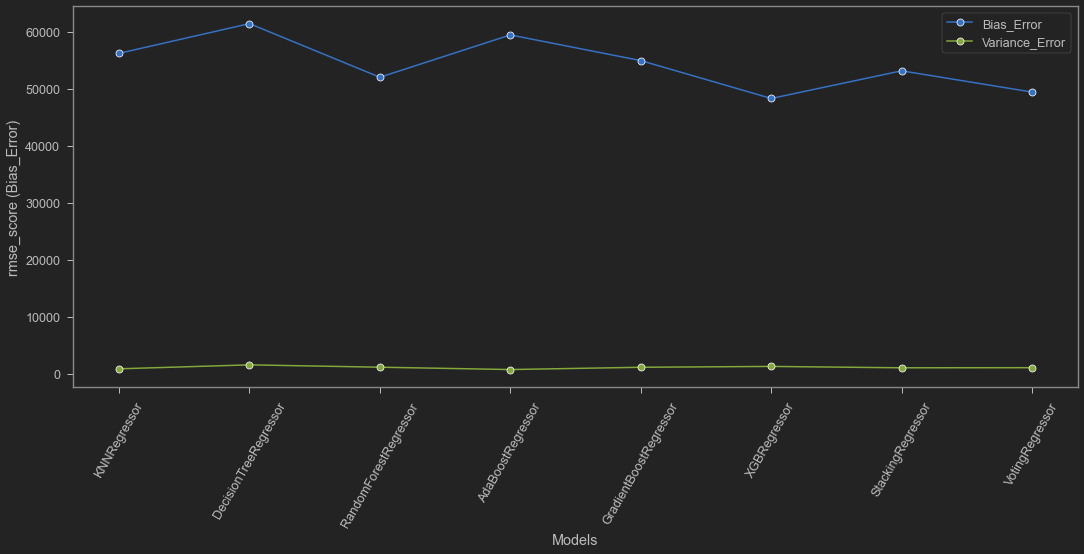

In [194]:
plt.figure(figsize=(18,7))
sns.lineplot(results_df['Models'],results_df['rmse_score (Bias_Error)'],marker='o',label='Bias_Error');
sns.lineplot(results_df['Models'],results_df['rmse_std_score (Variance_Error)'],marker='o',label='Variance_Error');
plt.legend();
plt.xticks(rotation=60);

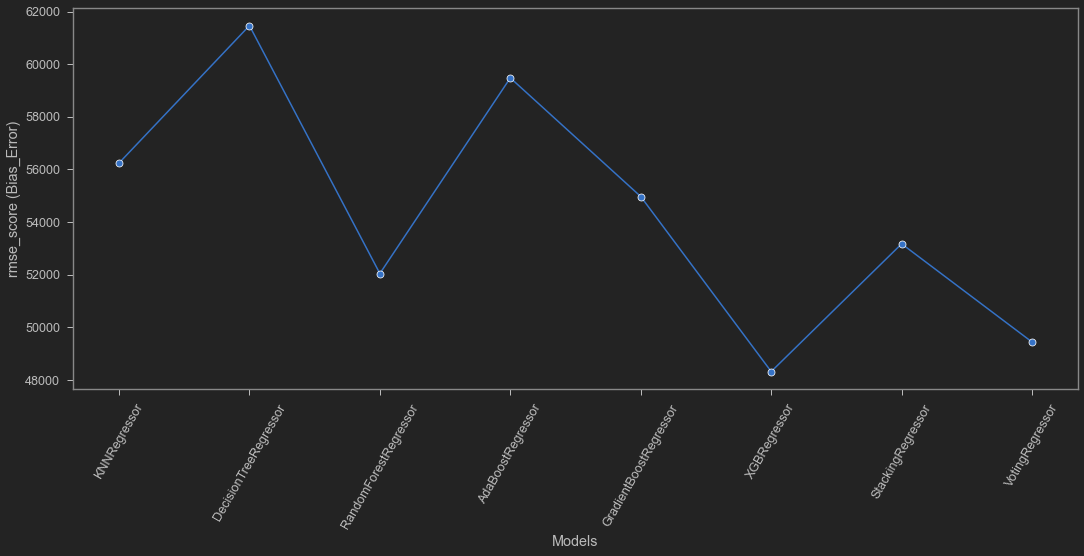

In [184]:
plt.figure(figsize=(18,7))
sns.lineplot(results_df['Models'],results_df['rmse_score (Bias_Error)'],marker='o');
plt.xticks(rotation=60);

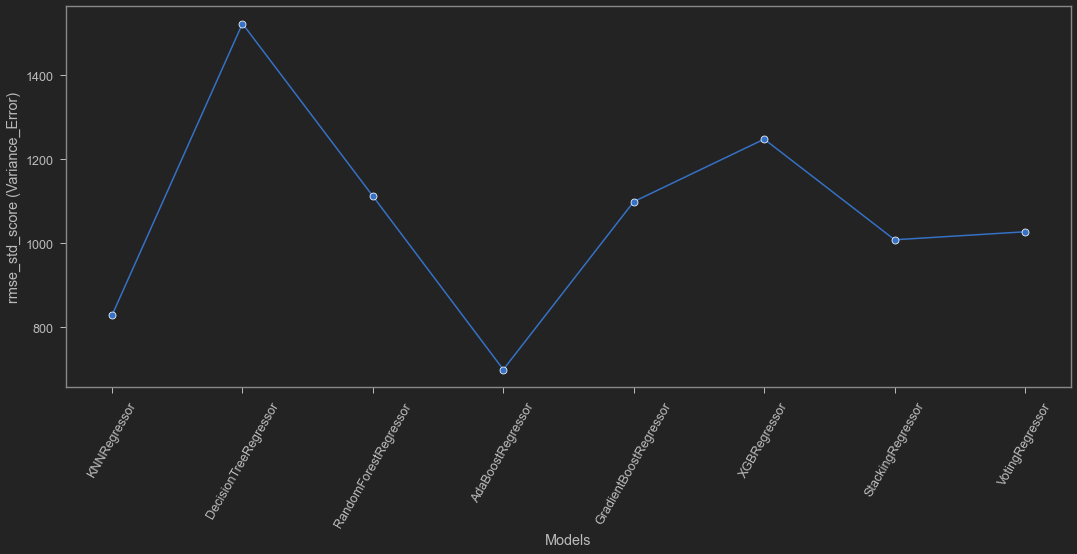

In [185]:
plt.figure(figsize=(18,7))
sns.lineplot(results_df['Models'],results_df['rmse_std_score (Variance_Error)'],marker='o');
plt.xticks(rotation=60);

In [201]:
results_df[['Models','rmse_score (Bias_Error)','rmse_std_score (Variance_Error)']].sort_values('rmse_score (Bias_Error)')

Models  rmse_score (Bias_Error)  \
5            XGBRegressor             48322.226733   
7         VotingRegressor             49442.671915   
2   RandomForestRegressor             52046.586572   
6       StackingRegressor             53175.430121   
4  GradientBoostRegressor             54972.044834   
0            KNNRegressor             56244.486046   
3       AdaBoostRegressor             59480.144518   
1   DecisionTreeRegressor             61466.534358   

   rmse_std_score (Variance_Error)  
5                      1247.894251  
7                      1027.461559  
2                      1112.218962  
6                      1008.380550  
4                      1099.112803  
0                       828.640147  
3                       699.539973  
1                      1522.814036

In [198]:
results_df[['Models','rmse_score (Bias_Error)','rmse_std_score (Variance_Error)']].sort_values('rmse_std_score (Variance_Error)')

Models  rmse_score (Bias_Error)  \
3       AdaBoostRegressor             59480.144518   
0            KNNRegressor             56244.486046   
6       StackingRegressor             53175.430121   
7         VotingRegressor             49442.671915   
4  GradientBoostRegressor             54972.044834   
2   RandomForestRegressor             52046.586572   
5            XGBRegressor             48322.226733   
1   DecisionTreeRegressor             61466.534358   

   rmse_std_score (Variance_Error)  
3                       699.539973  
0                       828.640147  
6                      1008.380550  
7                      1027.461559  
4                      1099.112803  
2                      1112.218962  
5                      1247.894251  
1                      1522.814036

### Overall Inference:
* Based on the above plots, we conclude that VotingRegressor performs better than other models by considering the Bias-Variance Tradeoff.
* Hence,we are choosing the 'VotingRegressor' as our Final Model.

In [104]:
residual_vote = y_test-y_test_pred

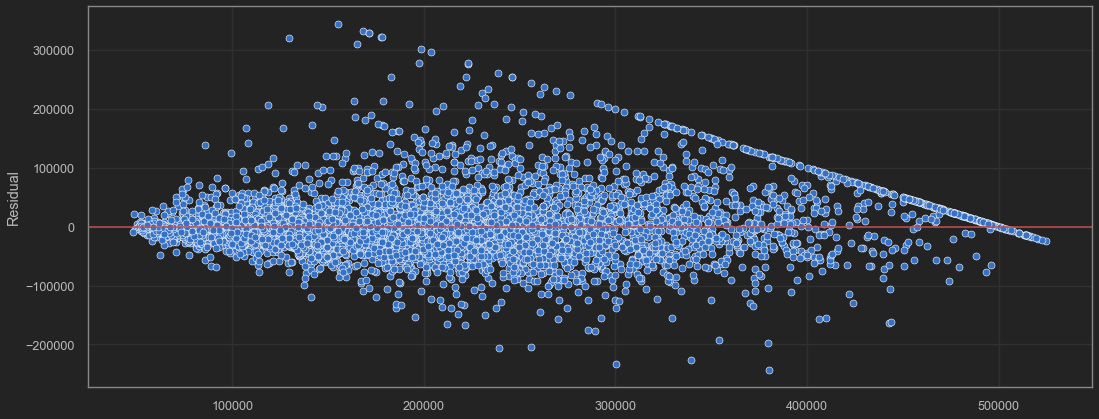

In [115]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=y_test_pred,y=residual_vote);
plt.ylabel('Residual')
plt.grid()
plt.axhline(y=0,c='r');

# Feature Importance based on Final Model:

### Partial Dependence Plot (PDP):

In [7]:
# As we choose VotingRegressor as final model, we need to do PDP to visualize the relationship between features.
# Based on this PDP, we can make interpretations with respect to Target variable.

In [214]:
from sklearn.inspection import plot_partial_dependence

In [15]:
x.columns

Index(['Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms',
       'Population', 'Households', 'Distance_to_coast', 'Distance_to_LA',
       'Distance_to_SanDiego', 'Distance_to_SanJose',
       'Distance_to_SanFrancisco'],
      dtype='object')

In [243]:
len(x.columns)

11

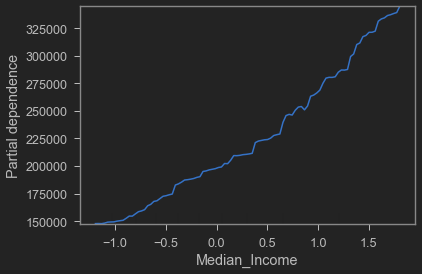

In [241]:
plot_partial_dependence(vote_model,x_scaled,features=[0],feature_names=x.columns);

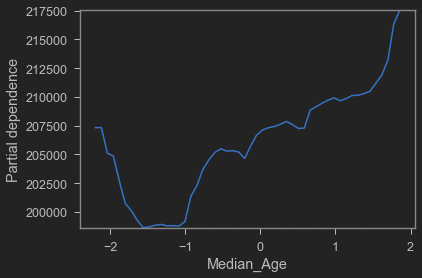

In [244]:
plot_partial_dependence(vote_model,x_scaled,features=[1],feature_names=x.columns);

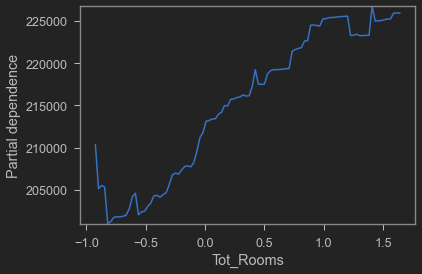

In [245]:
plot_partial_dependence(vote_model,x_scaled,features=[2],feature_names=x.columns);

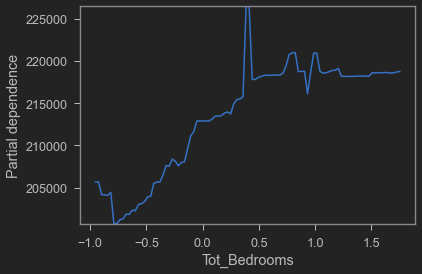

In [246]:
plot_partial_dependence(vote_model,x_scaled,features=[3],feature_names=x.columns);

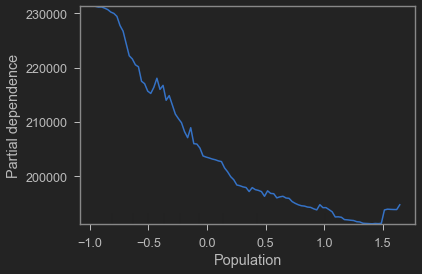

In [247]:
plot_partial_dependence(vote_model,x_scaled,features=[4],feature_names=x.columns);

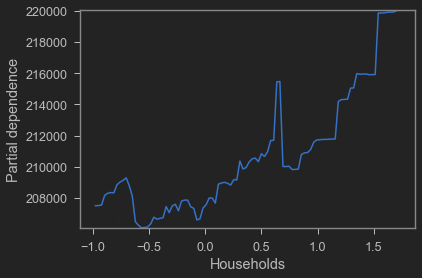

In [248]:
plot_partial_dependence(vote_model,x_scaled,features=[5],feature_names=x.columns);

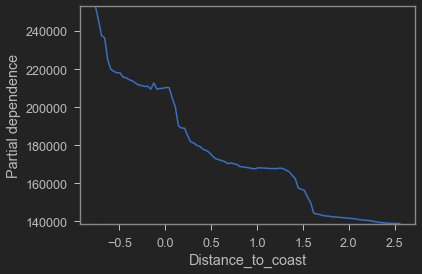

In [249]:
plot_partial_dependence(vote_model,x_scaled,features=[6],feature_names=x.columns);

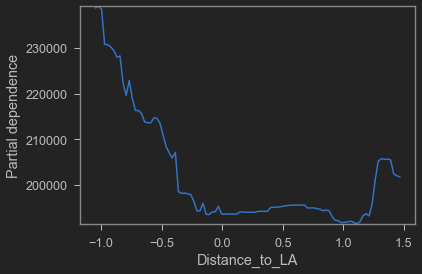

In [250]:
plot_partial_dependence(vote_model,x_scaled,features=[7],feature_names=x.columns);

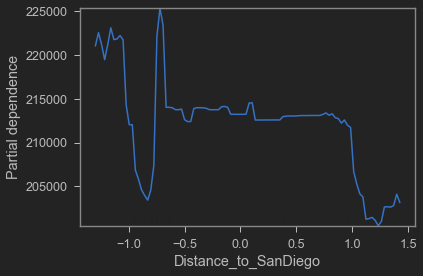

In [251]:
plot_partial_dependence(vote_model,x_scaled,features=[8],feature_names=x.columns);

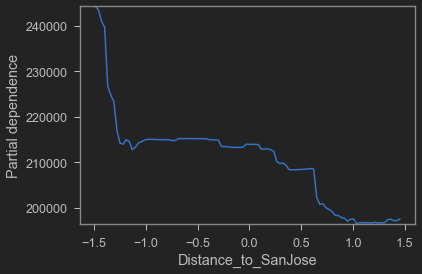

In [252]:
plot_partial_dependence(vote_model,x_scaled,features=[9],feature_names=x.columns);

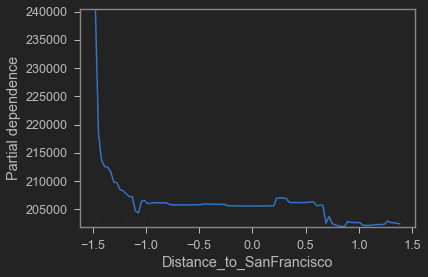

In [253]:
plot_partial_dependence(vote_model,x_scaled,features=[10],feature_names=x.columns);

### Inference:
* For PDP plot to interpret, it needs to satisfy the assumption of no-correlation between Independent Features, But we have strongly correlated features.
* We need to try ALE plot to interpret.

### Accumulated Local Effects (ALE) Plot:

In [52]:
# ALE Plot is used when the data has Multicollinearity.

In [26]:
from PyALE import ale

In [116]:
df.head()

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0       452600.000000       8.325200          41        880           129   
1       358500.000000       8.301400          21       7099          1106   
2       352100.000000       7.257400          52       1467           190   
3       341300.000000       5.643100          52       1274           235   
4       342200.000000       3.846200          52       1627           280   

   Population  Households  Distance_to_coast  Distance_to_LA  \
0         322         126        9263.040773   556529.158342   
1        2401        1138       10225.733072   554279.850069   
2         496         177        8259.085109   554610.717069   
3         558         219        7768.086571   555194.266086   
4         565         259        7768.086571   555194.266086   

   Distance_to_SanDiego  Distance_to_SanJose  Distance_to_SanFrancisco  
0         735501.806984         67432.517001              21250.213767  
1         733236.884360         65049.908574              20880.600400  
2         733525.682937         64867.289833              18811.487450  
3         734095.290744         65287.138412              18031.047568  
4         734095.290744         65287.138412              18031.047568

In [103]:
# Our Target is 'Median_House_Value'

In [54]:
x.columns

Index(['Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms',
       'Population', 'Households', 'Distance_to_coast', 'Distance_to_LA',
       'Distance_to_SanDiego', 'Distance_to_SanJose',
       'Distance_to_SanFrancisco'],
      dtype='object')

In [56]:
len(x.columns)

11

PyALE._ALE_generic:INFO: Continuous feature detected.


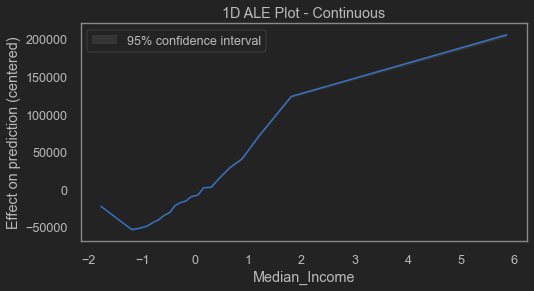

In [65]:
ale(X=x_scaled,model=vote_model,feature=[x.columns[0]]);

In [102]:
x[x.columns[0]].mean()   # Represents the x-axis for value = 0 (Because x-axis scaled to Z-Score)

3.8706710029070246

### Inference:
* As 'Median_Income' Increases, its Effect on prediction of 'Median_House_Price' also Increases.

PyALE._ALE_generic:INFO: Continuous feature detected.


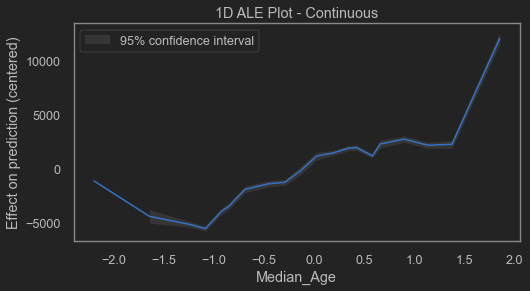

In [67]:
ale(X=x_scaled,model=vote_model,feature=[x.columns[1]]);

In [68]:
x[x.columns[1]].mean()

28.639486434108527

In [117]:
x[x.columns[1]].mean()-2*(x[x.columns[1]].std())

3.4683712098852517

In [118]:
x[x.columns[1]].mean()-1*(x[x.columns[1]].std())

16.05392882199689

### Inference:
* In 'Median_Age',For range 3.4 to 16 years old, its Effect on prediction of 'Median_House_Price' slowly decreases.
* For range above 16 years old its Effect on prediction of 'Median_House_Price' increases.

PyALE._ALE_generic:INFO: Continuous feature detected.


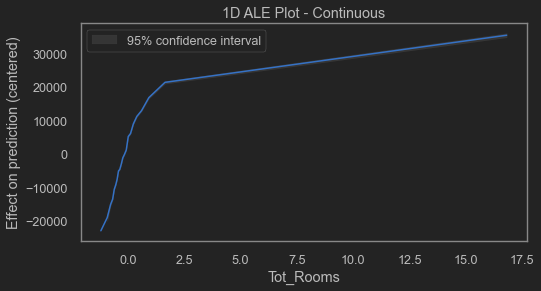

In [69]:
ale(X=x_scaled,model=vote_model,feature=[x.columns[2]]);

In [80]:
x[x.columns[2]].mean()

2635.7630813953488

In [121]:
x[x.columns[2]].mean()+1.5*(x[x.columns[2]].std())

5908.185958769529

### Inference:
* In 'Tot_Rooms',For range 2636 to 5908 rooms, its Effect on prediction of 'Median_House_Price' gradually increasing.
* For range above 5908 rooms its Effect on prediction of 'Median_House_Price' remains almost constant with very slight increase.

PyALE._ALE_generic:INFO: Continuous feature detected.


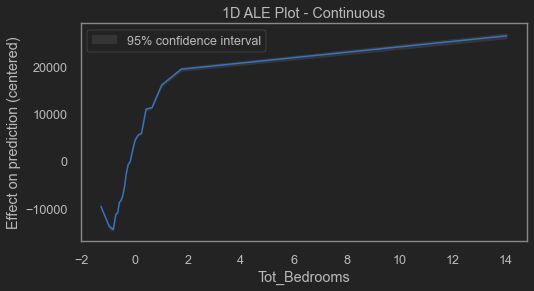

In [70]:
ale(X=x_scaled,model=vote_model,feature=[x.columns[3]]);

In [81]:
x[x.columns[3]].mean()

537.8980135658915

In [122]:
x[x.columns[3]].mean()+2*(x[x.columns[3]].std())

1380.393825452155

### Inference:
* In 'Tot_Bedrooms',For range 538 to 1380 rooms, its Effect on prediction of 'Median_House_Price' gradually increasing.
* For range above 1380 rooms its Effect on prediction of 'Median_House_Price' remains almost constant with very slight increase.

PyALE._ALE_generic:INFO: Continuous feature detected.


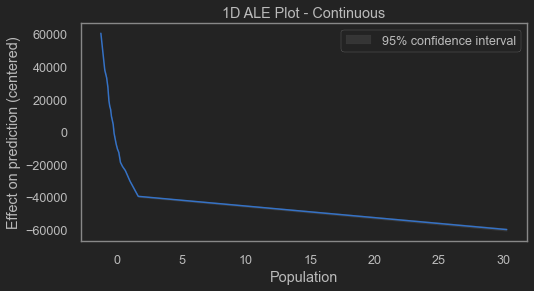

In [124]:
ale(X=x_scaled,model=vote_model,feature=[x.columns[4]]);

In [82]:
x[x.columns[4]].mean()

1425.4767441860465

In [126]:
x[x.columns[4]].mean()+2*(x[x.columns[4]].std())

3690.400987716722

### Inference:
* In 'Population',For range 1425 to 3690, its Effect on prediction of 'Median_House_Price' suddenly decreasing.
* For range above 3690 its Effect on prediction of 'Median_House_Price' slowly decreasing.

PyALE._ALE_generic:INFO: Continuous feature detected.


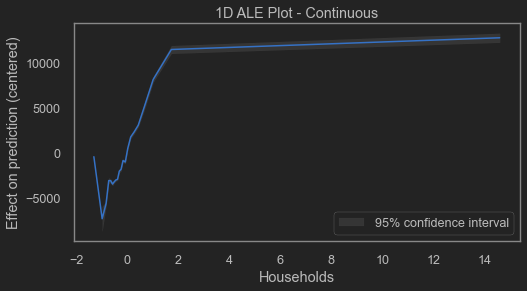

In [72]:
ale(X=x_scaled,model=vote_model,feature=[x.columns[5]]);

In [83]:
x[x.columns[5]].mean()

499.5396802325581

In [127]:
x[x.columns[5]].mean()+1.8*(x[x.columns[5]].std())

1187.733235329456

### Inference:
* In 'Households' upto 1188,its Effect on prediction of 'Median_House_Price' gradually increasing.
* After 1188 Households it remains constant.

PyALE._ALE_generic:INFO: Continuous feature detected.


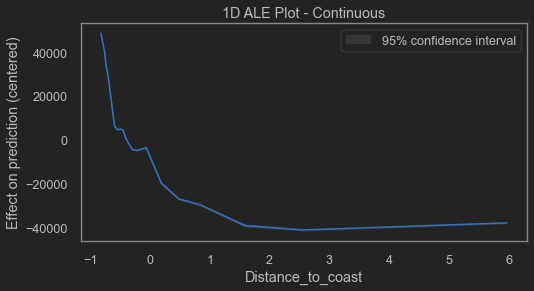

In [73]:
ale(X=x_scaled,model=vote_model,feature=[x.columns[6]]);

In [133]:
x[x.columns[6]].mean()

40509.26488328916

In [138]:
x[x.columns[6]].mean()-0.82*(x[x.columns[6]].std())

214.4327721108857

In [139]:
x[x.columns[6]].mean()+1.8*(x[x.columns[6]].std())

128961.33537124147

### Inference:
* In 'Distance_to_coast',For range 214 to 128961 metres, its Effect on prediction of 'Median_House_Price' suddenly decreasing.
* For range above 128961 metres its Effect on prediction of 'Median_House_Price' remains constant.

PyALE._ALE_generic:INFO: Continuous feature detected.


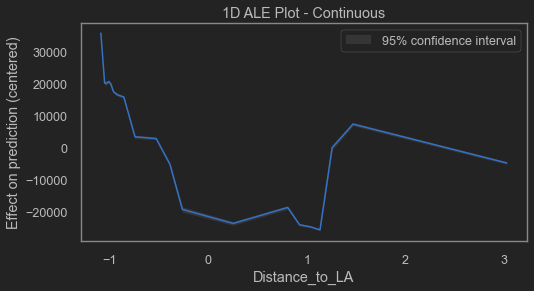

In [74]:
ale(X=x_scaled,model=vote_model,feature=[x.columns[7]]);

In [85]:
x[x.columns[7]].mean()

269421.9816463684

In [140]:
x[x.columns[7]].mean()-1*(x[x.columns[7]].std())

21689.535512775707

In [141]:
x[x.columns[7]].mean()+1.2*(x[x.columns[7]].std())

566700.9170066796

In [142]:
x[x.columns[7]].mean()+1.5*(x[x.columns[7]].std())

641020.6508467575

### Inference:
* In 'Distance_to_LA',For range 21690 to 566701 metres, its Effect on prediction of 'Median_House_Price' decreasing.
* For range 566701 to 641021 metres its Effect on prediction of 'Median_House_Price' increasing and after that range its decreasing.

PyALE._ALE_generic:INFO: Continuous feature detected.


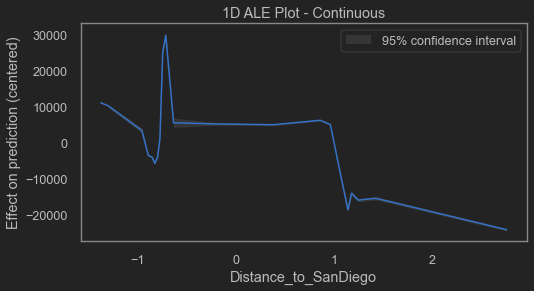

In [75]:
ale(X=x_scaled,model=vote_model,feature=[x.columns[8]]);

In [86]:
x[x.columns[8]].mean()

398164.93349422043

### Inference:
* In 'Distance_to_SanDiego', it follows some random trend.

PyALE._ALE_generic:INFO: Continuous feature detected.


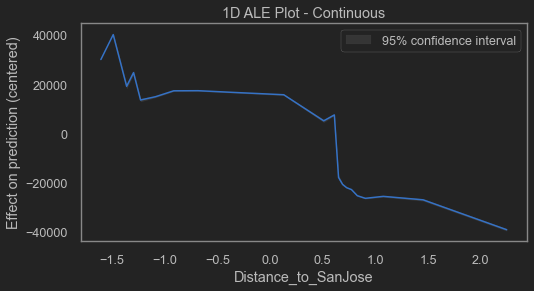

In [76]:
ale(X=x_scaled,model=vote_model,feature=[x.columns[9]]);

In [87]:
x[x.columns[9]].mean()

349187.55121862557

### Inference:
* In 'Distance_to_SanJose', it overall shows a decreasing trend in 'Median_House_Value' with some anomalies (remains constant for some range).

PyALE._ALE_generic:INFO: Continuous feature detected.


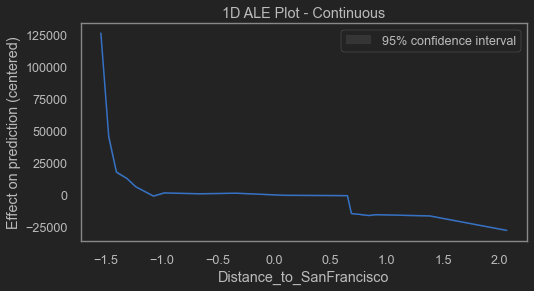

In [77]:
ale(X=x_scaled,model=vote_model,feature=[x.columns[10]]);

In [88]:
x[x.columns[10]].mean()

386688.4222911027

In [143]:
x[x.columns[10]].mean()-1.5*(x[x.columns[10]].std())

11505.133816642221

In [144]:
x[x.columns[10]].mean()-1*(x[x.columns[10]].std())

136566.22997479571

### Inference:
* In 'Distance_to_coast',For range 11505 to 136566 metres, its Effect on prediction of 'Median_House_Price' suddenly decreasing.
* For range above 136566 metres its Effect on prediction of 'Median_House_Price' remains constant.

# Business Interpretations:

* We chose VotingRegressor as Final Model.
* The Following are the results for VotingRegressor:
* r2_train=0.948503
* r2_test=0.812463
* rmse_train=26165.788313
* rmse_test=50052.700229
* r2_cross_val=0.816335
* rmse_cross_val=49442.671915 
* rmse_std_cross_val=1027.461559


### As we know that for predicted 'Median_House_Value', we got RMSE of (+ or -) 49,442.67`$` with standard deviation of 1027.46`$` and the overall R2_score of 81.63%.

### Interpretations for features:
---
* For High Median income for households within a block of houses (measured in tens of thousands of US Dollars) [10k`$`], there should be High Median house value for households within a block (measured in US Dollars) [`$`]
---
* In 'Median_Age',For range 3.5 to 16 years old, its Effect on prediction of 'Median_House_Price' slowly decreases.For range above 16 years old its Effect on prediction of 'Median_House_Price' increases.
---
* In 'Tot_Rooms',For range 2630 to 5910 rooms, its Effect on prediction of 'Median_House_Price' gradually increasing.For range above 5910 rooms its Effect on prediction of 'Median_House_Price' remains almost constant with very slight increase.
---
* In 'Tot_Bedrooms',For range 530 to 1380 rooms, its Effect on prediction of 'Median_House_Price' gradually increasing.For range above 1380 rooms its Effect on prediction of 'Median_House_Price' remains almost constant with very slight increase.
---
* In 'Population',For range 1420 to 3690, its Effect on prediction of 'Median_House_Price' suddenly decreasing.For range above 3690 its Effect on prediction of 'Median_House_Price' slowly decreasing.
---
* In 'Households' upto 1180,its Effect on prediction of 'Median_House_Price' gradually increasing.After 1180 Households it remains constant.
---
* In 'Distance_to_coast',For range 215 to 128960 metres, its Effect on prediction of 'Median_House_Price' suddenly decreasing.For range above 128960 metres its Effect on prediction of 'Median_House_Price' remains constant.
---
* In 'Distance_to_LA',For range 21690 to 566700 metres, its Effect on prediction of 'Median_House_Price' decreasing.For range 566700 to 641020 metres its Effect on prediction of 'Median_House_Price' increasing and after that range its decreasing.
---
* In 'Distance_to_SanDiego', it follows some random trend.
---
* In 'Distance_to_SanJose', it overall shows a decreasing trend in 'Median_House_Value' with some anomalies (remains constant for some range).
---
* In 'Distance_to_coast',For range 11505 to 136560 metres, its Effect on prediction of 'Median_House_Price' suddenly decreasing.For range above 136560 metres its Effect on prediction of 'Median_House_Price' remains constant.
---

# Limitations:
* R2_score for the Final Model (VotingRegressor) is 81.63% which is not an exceptional model to consider.
* RMSE value for the Final Model is comparitively low, but the value itself (49,442`$`) has major significance while prediction.
* Since, we choose the Non-Parametric Models (KNN,RandomForest,GradientBoosting,XGB) in VotingRegressor, the interpretations for each features with respect to target are very difficult.
* We didn't treat any Outliers and Multi-Collinearity issues present in the dataset, as it leads to data loss and explainability of the model.

# Conclusion:
* We tried 7 Models and selected the 'Voting Regressor' as the final model with 81.63% R2_score.
* We made Accumulated Local Effects (ALE) Plot to interpret the Independent features with respect to the target.
* We made Business Interpretations along with the limitations of the final model.

---